# **? חתול או כלב**

 Convolutional Neural Network באמצעות

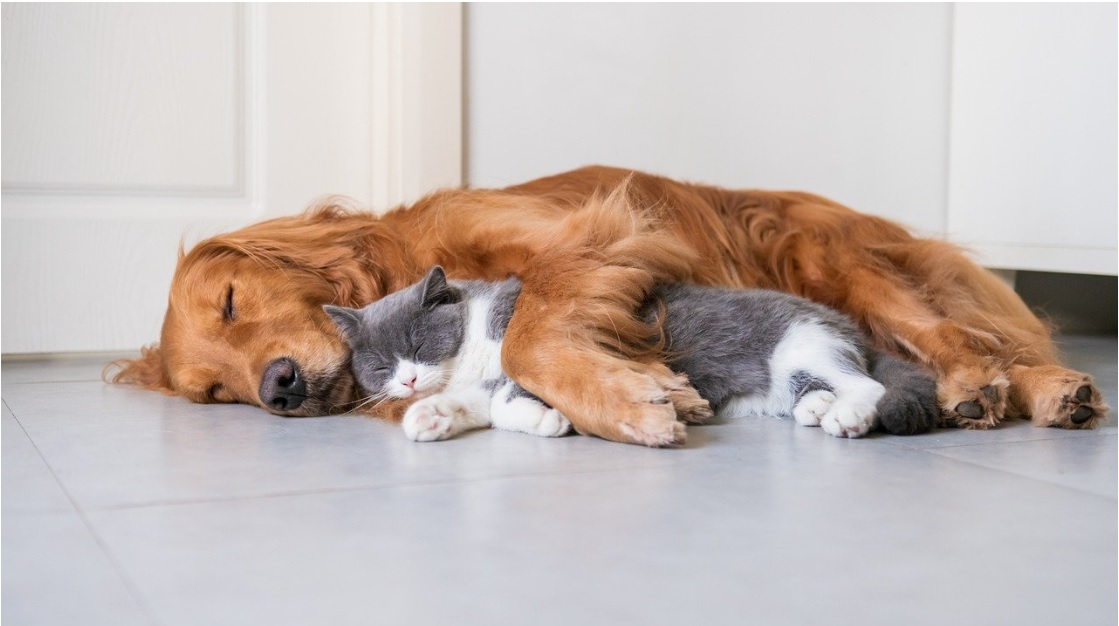

# **ייבוא ספריות וחבילות**

import + seed

In [ ]:
import os, time, pathlib, numpy as np
import matplotlib.pyplot as plt, matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
tf.keras.utils.set_random_seed(42)

Mount Google Drive הפעל את  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

real_dogscats_dir = '/content/drive/MyDrive/DataSet/real_pictures'
train_path = '/content/drive/MyDrive/DataSet/training_set'
test_path  = '/content/drive/MyDrive/DataSet/test_set'
real_dir = real_dogscats_dir

IMG_SIZE = (150, 150)
BATCH = 50


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


הקצה שמות עבור ספריות

In [ ]:
real_dogscats_dir = '/content/drive/MyDrive/DataSet/real_pictures'
train_path= '/content/drive/MyDrive/DataSet/training_set'
train_dir_path_cats = '/content/drive/MyDrive/DataSet/training_set/cats'
train_dir_path_dogs = '/content/drive/MyDrive/DataSet/training_set/dogs'
test_path= '/content/drive/MyDrive/DataSet/test_set'
test_dir_path_cats = '/content/drive/MyDrive/DataSet/test_set/cats'
test_dir_path_dogs = '/content/drive/MyDrive/DataSet/test_set/dogs'

מציג את מבנה ספריית המקור

In [ ]:
for dirname, _, filenames in os.walk(real_dogscats_dir):
    print(dirname)
    real_dir = dirname


/content/drive/MyDrive/DataSet/real_pictures


#**עכשיו, בואו נראה איך נראים שמות הקבצים:**

In [ ]:
train_cats_files = os.listdir(train_dir_path_cats)
print(train_cats_files[:10])

train_dogs_files = os.listdir(train_dir_path_dogs)
print(train_dogs_files[:10])

test_cats_files = os.listdir(test_dir_path_cats)
print(test_cats_files[:10])

test_dogs_files = os.listdir(test_dir_path_dogs)
print(test_dogs_files[:10])

real_files = os.listdir(real_dogscats_dir)
print(real_files)


['cat.3069.jpg', 'cat.3037.jpg', 'cat.2994.jpg', 'cat.3058.jpg', 'cat.3017.jpg', 'cat.3016.jpg', 'cat.3035.jpg', 'cat.3061.jpg', 'cat.2998.jpg', 'cat.3052.jpg']
['dog.3638.jpg', 'dog.3698.jpg', 'dog.3680.jpg', 'dog.3657.jpg', 'dog.3629.jpg', 'dog.3660.jpg', 'dog.3652.jpg', 'dog.3641.jpg', 'dog.3649.jpg', 'dog.3681.jpg']
['cat.4055.jpg', 'cat.4002.jpg', 'cat.4059.jpg', 'cat.4024.jpg', 'cat.4005.jpg', 'cat.4030.jpg', 'cat.4025.jpg', 'cat.4039.jpg', 'cat.4011.jpg', 'cat.4057.jpg']
['dog.4002.jpg', 'dog.4003.jpg', 'dog.4011.jpg', 'dog.4007.jpg', 'dog.4023.jpg', 'dog.4001.jpg', 'dog.4018.jpg', 'dog.4008.jpg', 'dog.4006.jpg', 'dog.4004.jpg']
['dog1.jpg', 'cat2.jpg', 'dog3.jpg', 'dog4.jpg', 'cat5.jpg', 'cat6.jpg', 'cat7.jpg', 'cat8.jpg', 'cat9.jpg', 'cat10.jpg', 'dog11.jpg', 'dog12.jpg', 'dog13.jpg', 'dog14.jpg', 'cat15.jpg', 'cat16.jpg', 'cat17.jpg', 'dog18.jpg', 'dog19.jpg', 'dog20.jpg']


#**בואו לגלות את המספר הכולל של התמונות בספריות:**

In [ ]:
import os

real_dogscats_dir = '/content/drive/MyDrive/DataSet/real_pictures'
train_path= '/content/drive/MyDrive/DataSet/training_set'
train_dir_path_cats = '/content/drive/MyDrive/DataSet/training_set/cats'
train_dir_path_dogs = '/content/drive/MyDrive/DataSet/training_set/dogs'
test_path= '/content/drive/MyDrive/DataSet/test_set'
test_dir_path_cats = '/content/drive/MyDrive/DataSet/test_set/cats'
test_dir_path_dogs = '/content/drive/MyDrive/DataSet/test_set/dogs'

train_cats_files = os.listdir(train_dir_path_cats)
train_dogs_files = os.listdir(train_dir_path_dogs)
test_cats_files = os.listdir(test_dir_path_cats)
test_dogs_files = os.listdir(test_dir_path_dogs)
real_files = os.listdir(real_dogscats_dir)

print("total training cat images:", len(train_cats_files))
print('total training dogs images:', len(train_dogs_files))
print('total test cat images:', len(test_cats_files))
print('total test dogs images:', len(test_dogs_files))
print('total real images:', len(real_files))

total training cat images: 3167
total training dogs images: 4000
total test cat images: 1000
total test dogs images: 1000
total real images: 20


Text(0.5, 1.0, 'Number Of Training Images Per Category')

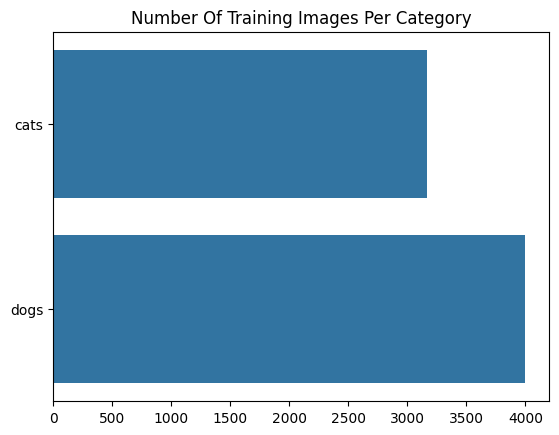

In [ ]:
#output ['dogs','cats']
category_names = os.listdir(train_path)

nb_categories = len(category_names)
train_images=[]
for category in category_names:
    folder = train_path + "/" + category
    train_images.append(len(os.listdir(folder)))
import seaborn as sns
sns.barplot(y=category_names, x=train_images).set_title('Number Of Training Images Per Category')

Text(0.5, 1.0, 'Number Of Validation Images Per Category')

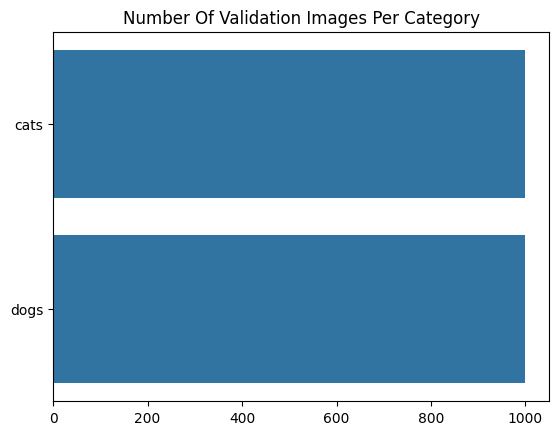

In [ ]:
validation_images=[]
for category in category_names:
    folder = test_path + "/" + category
    validation_images.append(len(os.listdir(folder)))
sns.barplot(y=category_names, x=validation_images).set_title('Number Of Validation Images Per Category')

#כעת, יוצג 8 תמונות שונות של חתולים ו-8 של כלבים. לחיצה חוזרת תציג תמונות אקראיות חדשות

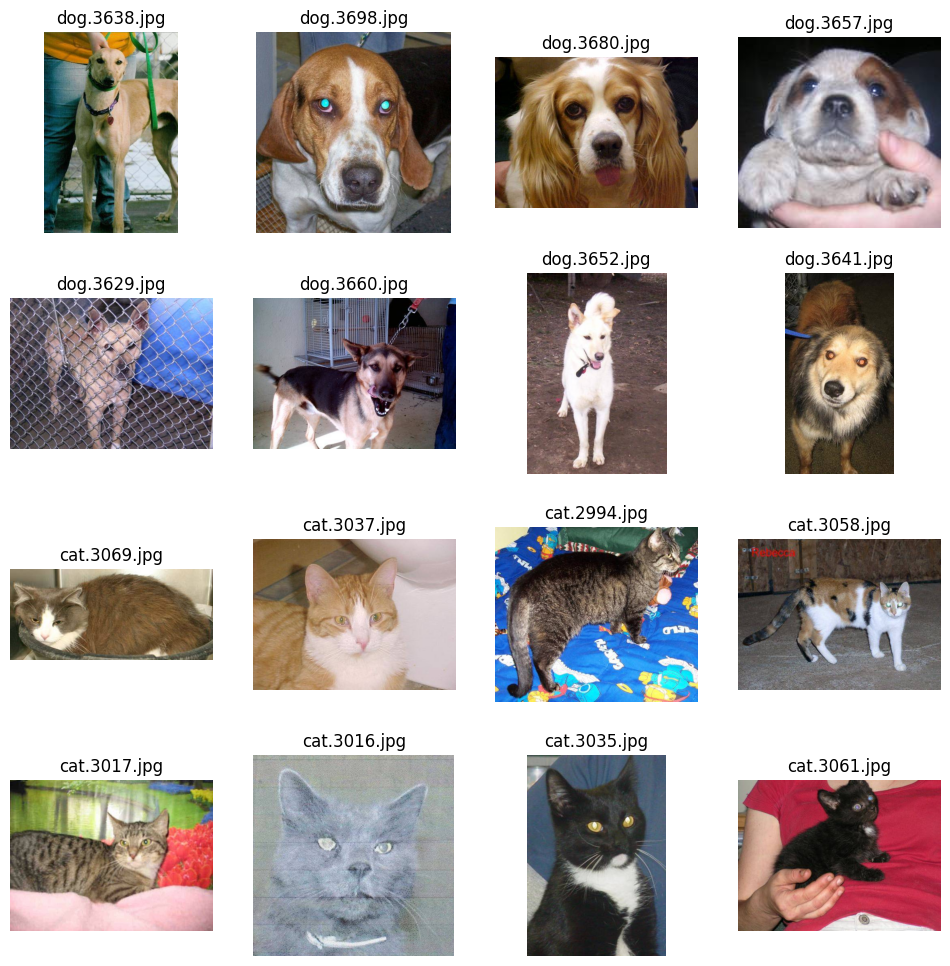

In [ ]:
pic_index = 0
# פרמטרים עבור הגרף שלנו; אנו נוציא תמונות בתצורת 4*4
nrows = 4
ncols = 4

# הגדרת גודל התמונה , matflotlib fig הגדרת הספרייה
fig = plt.gcf()
fig.set_size_inches(ncols * 3, nrows * 3)
pic_index += 8
next_dog_pix = [os.path.join(train_dir_path_dogs, fname)
                for fname in train_dogs_files[pic_index-8:pic_index]]
next_cat_pix = [os.path.join(train_dir_path_cats, fname)
                for fname in train_cats_files[pic_index-8:pic_index]]

for i, img_path in enumerate(next_dog_pix+next_cat_pix):
  # מתחילים מ1 subplot מדדי ה; subplot הגדר
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # אל תציג צירים (או קווי רשת)
  img = mpimg.imread(img_path)
  plt.title(img_path[len(img_path)-12:])
  plt.imshow(img)

plt.show()


# **בניית מודל**

**מכיוון שאנו עומדים בפני זיהוי בין שני סוגי תמונות(כלבים וחתולים), נסיים את הרשת נוירונים שלנו בהפעלת סיגמואידית, כך שהפלט של הרשת שלנו יהיה סקלאר בודד בין 0 ל-1, המקודד את ההסתברות שהתמונה הנוכחית היא סוג1 (כפי בניגוד לסוג 0).**

In [ ]:
model = keras.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(*IMG_SIZE, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#**פעולה המדפיסה באופן מסכם את הפעולה של הרשת נוירונים**

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     1,605,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,879,745 (7.17 MB)

 Trainable params: 1,879,745 (7.17 MB)

 Non-trainable params: 0 (0.00 B)

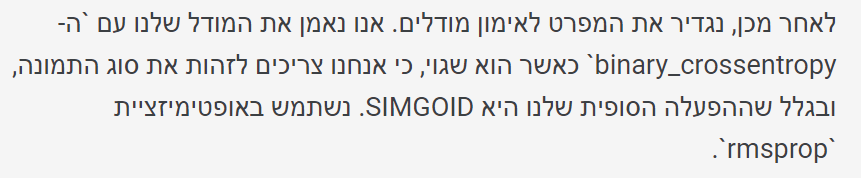

from keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])
              -כל זה היה קודם ונמחק

### **עיבוד נתונים מראש**
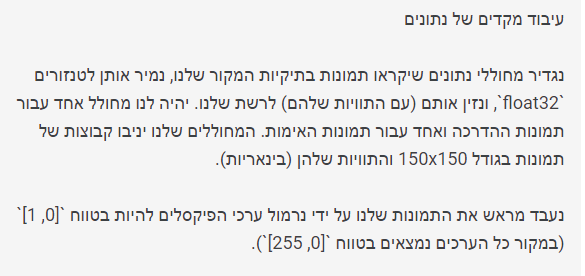

In [ ]:
# check for GPU
device_name = tf.test.gpu_device_name()
print('Found GPU at: {}'.format(device_name))

Found GPU at: 


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH,
    class_mode='binary',
    seed=42
)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=IMG_SIZE,
    batch_size=BATCH,
    class_mode='binary',
    seed=42
)

steps_per_epoch = train_generator.samples // BATCH
validation_steps = test_generator.samples // BATCH


Found 7167 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


### **אימון**
ההפסד והדיוק הם אינדיקציה מצוינת להתקדמות האימון. זה ניחוש לגבי הסיווג של נתוני האימון, ואז מודד אותם מול התווית הידועה, מחשב את התוצאה. דיוק הוא החלק של ניחושים נכונים

In [ ]:
ckpt_path = '/content/drive/MyDrive/DataSet/checkpoints/dogs_cats.h5'
os.makedirs(os.path.dirname(ckpt_path), exist_ok=True)
callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True),
    keras.callbacks.ModelCheckpoint(ckpt_path, save_best_only=True)
]

t0 = time.time()
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=25,
    validation_data=test_generator,
    validation_steps=validation_steps,
    callbacks=callbacks,
    verbose=1
)
t1 = time.time()
print(str(t1 - t0) + " seconds")


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.5573 - loss: 0.6827

143/143 ━━━━━━━━━━━━━━━━━━━━ 1781s 13s/step - accuracy: 0.5573 - loss: 0.6827 - val_accuracy: 0.5000 - val_loss: 0.6849
Epoch 2/25
  1/143 ━━━━━━━━━━━━━━━━━━━━ 6:49 3s/step - accuracy: 0.5200 - loss: 0.6953

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


143/143 ━━━━━━━━━━━━━━━━━━━━ 45s 297ms/step - accuracy: 0.5200 - loss: 0.6953 - val_accuracy: 0.5000 - val_loss: 0.6820
Epoch 3/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5499 - loss: 0.6708

143/143 ━━━━━━━━━━━━━━━━━━━━ 334s 2s/step - accuracy: 0.5500 - loss: 0.6707 - val_accuracy: 0.5000 - val_loss: 0.6648
Epoch 4/25
  1/143 ━━━━━━━━━━━━━━━━━━━━ 3:47 2s/step - accuracy: 0.7200 - loss: 0.6576

143/143 ━━━━━━━━━━━━━━━━━━━━ 29s 191ms/step - accuracy: 0.7200 - loss: 0.6576 - val_accuracy: 0.5000 - val_loss: 0.6642
Epoch 5/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5733 - loss: 0.6576

143/143 ━━━━━━━━━━━━━━━━━━━━ 334s 2s/step - accuracy: 0.5733 - loss: 0.6576 - val_accuracy: 0.5410 - val_loss: 0.6640
Epoch 6/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 27s 179ms/step - accuracy: 0.6000 - loss: 0.5895 - val_accuracy: 0.5395 - val_loss: 0.6677
Epoch 7/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5750 - loss: 0.6605

143/143 ━━━━━━━━━━━━━━━━━━━━ 315s 2s/step - accuracy: 0.5750 - loss: 0.6605 - val_accuracy: 0.6300 - val_loss: 0.6427
Epoch 8/25
  1/143 ━━━━━━━━━━━━━━━━━━━━ 3:50 2s/step - accuracy: 0.6200 - loss: 0.6602

143/143 ━━━━━━━━━━━━━━━━━━━━ 29s 194ms/step - accuracy: 0.6200 - loss: 0.6602 - val_accuracy: 0.6325 - val_loss: 0.6418
Epoch 9/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 334s 2s/step - accuracy: 0.6234 - loss: 0.6437 - val_accuracy: 0.5930 - val_loss: 0.6545
Epoch 10/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 28s 184ms/step - accuracy: 0.6000 - loss: 0.6480 - val_accuracy: 0.5860 - val_loss: 0.6553
Epoch 11/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6317 - loss: 0.6335

143/143 ━━━━━━━━━━━━━━━━━━━━ 316s 2s/step - accuracy: 0.6317 - loss: 0.6335 - val_accuracy: 0.6245 - val_loss: 0.6348
Epoch 12/25
  1/143 ━━━━━━━━━━━━━━━━━━━━ 3:47 2s/step - accuracy: 0.6200 - loss: 0.5916

143/143 ━━━━━━━━━━━━━━━━━━━━ 29s 191ms/step - accuracy: 0.6200 - loss: 0.5916 - val_accuracy: 0.6770 - val_loss: 0.5992
Epoch 13/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 354s 2s/step - accuracy: 0.6644 - loss: 0.6073 - val_accuracy: 0.6680 - val_loss: 0.6032
Epoch 14/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 27s 177ms/step - accuracy: 0.7000 - loss: 0.5605 - val_accuracy: 0.6470 - val_loss: 0.6168
Epoch 15/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 354s 2s/step - accuracy: 0.6596 - loss: 0.6071 - val_accuracy: 0.6850 - val_loss: 0.6002
4421.2524766922 seconds


In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.figure()
plt.grid(True)
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.grid(True)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


NameError: name 'history' is not defined

# **בדיקת הדגם על תמונות אמיתיות**


In [ ]:
picnum = 20
files = sorted(os.listdir(real_dir))[:picnum]
imgs = [load_img(os.path.join(real_dir, f)) for f in files]
X = np.stack([img_to_array(load_img(os.path.join(real_dir, f), target_size=IMG_SIZE)) for f in files]) / 255.0
pred = (model.predict(X, batch_size=picnum).ravel() > 0.5).astype(int)
class_names = ['cat','dog']
actType = ['dog' if 'dog' in f.lower() else 'cat' for f in files]
nrows, ncols = 5, 4
fig = plt.gcf()
fig.set_size_inches(ncols * 5, nrows * 5)
for i in range(picnum):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')
    plt.imshow(imgs[i])
    plt.title("prediction: " + class_names[pred[i]] + "\nActual: " + actType[i])
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/DataSet/real_pictures'

NameError: name 'imgs' is not defined

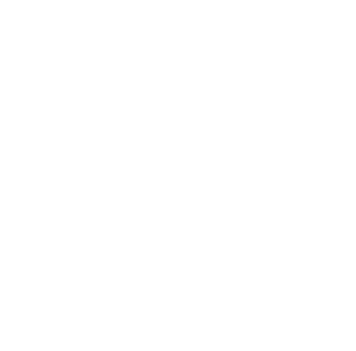

In [ ]:
nrows = 5
ncols = 4
class_names=['cat','dog']

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 5, nrows * 5)

for i in range(picnum):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    plt.imshow(imgs[i])
    plt.title("prediction: "+ class_names[real_pred[i]] +"\nActual: " + actType[i])

plt.show()

# **end of project**